<a href="https://colab.research.google.com/github/YashPatilAIDS/Data-Science-TY/blob/main/Data_Science_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data science


## Experiment 1

### Mounting google drive

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [33]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

###Import first dataset

In [34]:
df1=pd.read_csv('student_info.csv')
df1

FileNotFoundError: [Errno 2] No such file or directory: 'student_info.csv'

### Import second dataset

In [ ]:
df2 = pd.read_csv('student_scores.csv')
df2

### merge the dataset

In [ ]:
df3 = pd.concat([df1, df2], axis=1)
df3

## Experiment 2

### Import dataset

In [ ]:
df = pd.read_csv('grapes_new.csv')
df

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe(include="all")

### get more info

In [ ]:
df.info()

### visualize data for better understanding

In [ ]:
features = df.columns.tolist()

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    df[feature].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram for {feature}')
plt.tight_layout()
plt.show()

### Checking the DF for null values


In [ ]:
df.isnull().sum()

### Removing any null values

In [ ]:
df=df.dropna()

### Checking if null values are removed


In [ ]:
df.isnull().sum()

In [ ]:
features = df.columns.tolist()
# Plot box plots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()


### removing outliers

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df

### checking if outliers are removed

In [ ]:
features = df.columns.tolist()
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot for {feature}')
plt.tight_layout()
plt.show()


# Experiment 3
## 3. Data Preprocessing-Applying, encoding techniques using data set obtained from UCI ML repository

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [37]:
df = pd.read_csv('/content/drive/MyDrive/grapes_new.csv')

## Describing data

In [38]:
df.describe()

COLOR_INTENSITY  RIPENESS_PER  ALCOHOL_PER  MALIC_ACID_PER         ASH  \
count       194.000000    192.000000   191.000000      194.000000  194.000000   
mean        116.882113     21.512604    13.024241        2.335103    2.365361   
std          14.333204      2.386562     0.809621        1.118041    0.268158   
min          93.000000     16.170000    11.030000        0.740000    1.360000   
25%         105.470000     20.315000    12.370000        1.610000    2.210000   
50%         114.910000     21.820000    13.050000        1.865000    2.360000   
75%         124.060000     23.345000    13.685000        3.082500    2.547500   
max         167.000000     25.200000    14.830000        5.800000    3.230000   

       ALCALINITY_OF_ASH  MAGNESIUM_MEASURE  TOTAL_PHENOLS  FLAVANOIDS  \
count         188.000000         194.000000     194.000000  194.000000   
mean           19.485106          99.680412       2.296649    2.016856   
std             3.434971          14.252749       0.634317    1.001351   
min            10.600000          70.000000       0.980000    0.340000   
25%            17.075000          88.000000       1.725000    1.092500   
50%            19.500000          97.500000       2.355000    2.135000   
75%            21.500000         107.000000       2.800000    2.875000   
max            30.000000         162.000000       3.880000    5.080000   

       PROANTHOCYANINS         HUE      PROLINE  TEMPERATURE  AVG_HUMIDITY  \
count       194.000000  192.000000   194.000000   194.000000    194.000000   
mean          1.577216    0.955740   754.164948    26.418247     50.976082   
std           0.565445    0.228217   316.093797     3.042364      3.367880   
min           0.410000    0.480000   278.000000    21.020000     44.230000   
25%           1.225000    0.787500   504.000000    24.222500     48.360000   
50%           1.545000    0.975000   675.000000    26.195000     51.145000   
75%           1.950000    1.112500   988.750000    28.737500     53.722500   
max           3.580000    1.710000  1680.000000    32.340000     57.950000   

       FERT_NITRO_PER  WATER_O2_PER    WATER_PH  FER_P2O5_PER  
count      194.000000    190.000000  194.000000    194.000000  
mean        30.562216     90.178000    7.680979     42.195155  
std          1.126867      5.364122    0.509935     10.398205  
min         27.670000     80.360000    6.510000     20.000000  
25%         29.932500     85.685000    7.252500     33.742500  
50%         30.710000     90.160000    7.670000     44.820000  
75%         31.382500     94.445000    8.127500     50.542500  
max         34.160000     99.770000    8.500000     60.870000

## Checking for missing values

In [39]:
df.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         2
ALCOHOL_PER          3
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    6
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  2
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         4
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

## Filling the null values with the mean

In [40]:
df.dropna()

COLOR_INTENSITY       SHAPE  RIPENESS_PER  ALCOHOL_PER  MALIC_ACID_PER  \
0             120.53  elliptical         16.73        14.23            1.71   
1             112.57  elliptical         20.30        13.20            1.78   
2             120.78  elliptical         20.81        13.16            2.36   
3             134.17  elliptical         19.47        14.37            1.95   
4             112.19       round         17.57        13.24            2.59   
..               ...         ...           ...          ...             ...   
187           101.33  elliptical         22.16        13.05            5.80   
188           102.60  elliptical         21.78        11.87            4.31   
189           102.34  elliptical         21.23        12.07            2.16   
191           103.86       round         22.01        11.79            2.13   
192            98.30  elliptical         21.95        12.37            1.63   

      ASH  ALCALINITY_OF_ASH  MAGNESIUM_MEASURE  TOTAL_PHENOLS  FLAVANOIDS  \
0    2.43               15.6                127           2.80        3.06   
1    2.14               11.2                100           2.65        2.76   
2    2.67               18.6                101           2.80        3.24   
3    2.50               16.8                113           3.85        3.49   
4    2.87               21.0                118           2.80        2.69   
..    ...                ...                ...            ...         ...   
187  2.13               21.5                 86           2.62        2.65   
188  2.39               21.0                 82           2.86        3.03   
189  2.17               21.0                 85           2.60        2.65   
191  2.78               28.5                 92           2.13        2.24   
192  2.30               24.5                 88           2.22        2.45   

     ...   HUE  PROLINE  TEMPERATURE  AVG_HUMIDITY  FERT_NITRO_PER  \
0    ...  1.04     1065        23.34         54.99           31.21   
1    ...  1.05     1050        23.40         51.91           31.28   
2    ...  1.03     1185        22.29         50.69           31.92   
3    ...  0.86     1480        21.28         47.72           31.79   
4    ...  1.04      735        23.76         45.09           31.86   
..   ...   ...      ...          ...           ...             ...   
187  ...  0.73      380        25.69         53.66           31.58   
188  ...  0.75      380        28.32         56.74           28.21   
189  ...  0.86      378        25.58         46.15           30.14   
191  ...  0.97      466        27.62         48.98           30.46   
192  ...  0.89      342        27.54         47.72           30.01   

     WATER_O2_PER  WATER_PH  FER_P2O5_PER  SOIL_TYPE   CLASS  
0           97.67      7.71         52.02    archean    High  
1           99.05      7.66         48.18    archean    High  
2           97.95      7.66         28.15    archean    High  
3           95.46      7.21         55.95   alluvial    High  
4           94.45      7.80         55.99    archean    High  
..            ...       ...           ...        ...     ...  
187         92.03      7.19         47.61   alluvial  Medium  
188         89.72      6.74         38.88   alluvial  Medium  
189         89.52      8.49         55.83   alluvial  Medium  
191         86.31      7.57         47.57    archean  Medium  
192         90.60      7.15         45.91   alluvial  Medium  

[177 rows x 21 columns]

## Splitting dataset into features and targets


In [41]:
X = df.drop('CLASS', axis=1)
y = df['CLASS']

In [42]:
X.head()

COLOR_INTENSITY       SHAPE  RIPENESS_PER  ALCOHOL_PER  MALIC_ACID_PER  \
0           120.53  elliptical         16.73        14.23            1.71   
1           112.57  elliptical         20.30        13.20            1.78   
2           120.78  elliptical         20.81        13.16            2.36   
3           134.17  elliptical         19.47        14.37            1.95   
4           112.19       round         17.57        13.24            2.59   

    ASH  ALCALINITY_OF_ASH  MAGNESIUM_MEASURE  TOTAL_PHENOLS  FLAVANOIDS  \
0  2.43               15.6                127           2.80        3.06   
1  2.14               11.2                100           2.65        2.76   
2  2.67               18.6                101           2.80        3.24   
3  2.50               16.8                113           3.85        3.49   
4  2.87               21.0                118           2.80        2.69   

   PROANTHOCYANINS   HUE  PROLINE  TEMPERATURE  AVG_HUMIDITY  FERT_NITRO_PER  \
0             2.29  1.04     1065        23.34         54.99           31.21   
1             1.28  1.05     1050        23.40         51.91           31.28   
2             2.81  1.03     1185        22.29         50.69           31.92   
3             2.18  0.86     1480        21.28         47.72           31.79   
4             1.82  1.04      735        23.76         45.09           31.86   

   WATER_O2_PER  WATER_PH  FER_P2O5_PER SOIL_TYPE  
0         97.67      7.71         52.02   archean  
1         99.05      7.66         48.18   archean  
2         97.95      7.66         28.15   archean  
3         95.46      7.21         55.95  alluvial  
4         94.45      7.80         55.99   archean

In [43]:
y.head(100)

0     High
1     High
2     High
3     High
4     High
      ... 
95     Low
96     Low
97     Low
98     Low
99     Low
Name: CLASS, Length: 100, dtype: object

## Encoding all categorial values

In [44]:
label_encoder = LabelEncoder()

In [45]:
categorical_columns = ['SHAPE', 'SOIL_TYPE']
label_encoders = {}

In [46]:
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

## Performing normalization

In [47]:
minmax_scaler = MinMaxScaler()
X_min_max = minmax_scaler.fit_transform(X)
pd.DataFrame(X_min_max, columns=X.columns).head()

COLOR_INTENSITY  SHAPE  RIPENESS_PER  ALCOHOL_PER  MALIC_ACID_PER  \
0         0.372027    0.0      0.062016     0.842105        0.191700   
1         0.264459    0.0      0.457364     0.571053        0.205534   
2         0.375405    0.0      0.513843     0.560526        0.320158   
3         0.556351    0.0      0.365449     0.878947        0.239130   
4         0.259324    1.0      0.155039     0.581579        0.365613   

        ASH  ALCALINITY_OF_ASH  MAGNESIUM_MEASURE  TOTAL_PHENOLS  FLAVANOIDS  \
0  0.572193           0.257732           0.619565       0.627586    0.573840   
1  0.417112           0.030928           0.326087       0.575862    0.510549   
2  0.700535           0.412371           0.336957       0.627586    0.611814   
3  0.609626           0.319588           0.467391       0.989655    0.664557   
4  0.807487           0.536082           0.521739       0.627586    0.495781   

   PROANTHOCYANINS       HUE   PROLINE  TEMPERATURE  AVG_HUMIDITY  \
0         0.593060  0.455285  0.561341     0.204947      0.784257   
1         0.274448  0.463415  0.550642     0.210247      0.559767   
2         0.757098  0.447154  0.646933     0.112191      0.470845   
3         0.558360  0.308943  0.857347     0.022968      0.254373   
4         0.444795  0.455285  0.325963     0.242049      0.062682   

   FERT_NITRO_PER  WATER_O2_PER  WATER_PH  FER_P2O5_PER  SOIL_TYPE  
0        0.545455      0.891808  0.603015      0.783460        1.0  
1        0.556240      0.962906  0.577889      0.689503        1.0  
2        0.654854      0.906234  0.577889      0.199413        1.0  
3        0.634823      0.777950  0.351759      0.879618        0.0  
4        0.645609      0.725914  0.648241      0.880597        1.0

# Experiment 4
Data Preprocessing-Normalizing, scaling, balancing data set using data set obtained from UCI ML repository

## Mouting Drive

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing packages

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('/content/drive/MyDrive/grapes_new.csv')
df.describe()

COLOR_INTENSITY  RIPENESS_PER  ALCOHOL_PER  MALIC_ACID_PER         ASH  \
count       194.000000    192.000000   191.000000      194.000000  194.000000   
mean        116.882113     21.512604    13.024241        2.335103    2.365361   
std          14.333204      2.386562     0.809621        1.118041    0.268158   
min          93.000000     16.170000    11.030000        0.740000    1.360000   
25%         105.470000     20.315000    12.370000        1.610000    2.210000   
50%         114.910000     21.820000    13.050000        1.865000    2.360000   
75%         124.060000     23.345000    13.685000        3.082500    2.547500   
max         167.000000     25.200000    14.830000        5.800000    3.230000   

       ALCALINITY_OF_ASH  MAGNESIUM_MEASURE  TOTAL_PHENOLS  FLAVANOIDS  \
count         188.000000         194.000000     194.000000  194.000000   
mean           19.485106          99.680412       2.296649    2.016856   
std             3.434971          14.252749       0.634317    1.001351   
min            10.600000          70.000000       0.980000    0.340000   
25%            17.075000          88.000000       1.725000    1.092500   
50%            19.500000          97.500000       2.355000    2.135000   
75%            21.500000         107.000000       2.800000    2.875000   
max            30.000000         162.000000       3.880000    5.080000   

       PROANTHOCYANINS         HUE      PROLINE  TEMPERATURE  AVG_HUMIDITY  \
count       194.000000  192.000000   194.000000   194.000000    194.000000   
mean          1.577216    0.955740   754.164948    26.418247     50.976082   
std           0.565445    0.228217   316.093797     3.042364      3.367880   
min           0.410000    0.480000   278.000000    21.020000     44.230000   
25%           1.225000    0.787500   504.000000    24.222500     48.360000   
50%           1.545000    0.975000   675.000000    26.195000     51.145000   
75%           1.950000    1.112500   988.750000    28.737500     53.722500   
max           3.580000    1.710000  1680.000000    32.340000     57.950000   

       FERT_NITRO_PER  WATER_O2_PER    WATER_PH  FER_P2O5_PER  
count      194.000000    190.000000  194.000000    194.000000  
mean        30.562216     90.178000    7.680979     42.195155  
std          1.126867      5.364122    0.509935     10.398205  
min         27.670000     80.360000    6.510000     20.000000  
25%         29.932500     85.685000    7.252500     33.742500  
50%         30.710000     90.160000    7.670000     44.820000  
75%         31.382500     94.445000    8.127500     50.542500  
max         34.160000     99.770000    8.500000     60.870000

## Looking for null values

In [99]:
df.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         2
ALCOHOL_PER          3
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    6
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  2
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         4
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

## Dropping any null values

In [106]:
df.dropna(inplace=True)

In [107]:
df.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         0
ALCOHOL_PER          0
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    0
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  0
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         0
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

## Splitting the dataset into X and Y

In [108]:
X = df.drop('CLASS', axis=1)
y = df['CLASS']
X.head()
y.head()

0    High
1    High
2    High
3    High
4    High
Name: CLASS, dtype: object

## Encoding any categorical values into numerical

In [109]:
categorical_columns = ['SHAPE', 'SOIL_TYPE']
label_encoders = {}

In [110]:
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

## Scaling using MinMax Scaling

In [111]:
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

In [112]:
pd.DataFrame(X_minmax, columns=X.columns).head()

COLOR_INTENSITY  SHAPE  RIPENESS_PER  ALCOHOL_PER  MALIC_ACID_PER  \
0         0.372027    0.0      0.062016     0.842105        0.191700   
1         0.264459    0.0      0.457364     0.571053        0.205534   
2         0.375405    0.0      0.513843     0.560526        0.320158   
3         0.556351    0.0      0.365449     0.878947        0.239130   
4         0.259324    1.0      0.155039     0.581579        0.365613   

        ASH  ALCALINITY_OF_ASH  MAGNESIUM_MEASURE  TOTAL_PHENOLS  FLAVANOIDS  \
0  0.572193           0.257732           0.619565       0.627586    0.573840   
1  0.417112           0.030928           0.326087       0.575862    0.510549   
2  0.700535           0.412371           0.336957       0.627586    0.611814   
3  0.609626           0.319588           0.467391       0.989655    0.664557   
4  0.807487           0.536082           0.521739       0.627586    0.495781   

   PROANTHOCYANINS       HUE   PROLINE  TEMPERATURE  AVG_HUMIDITY  \
0         0.655052  0.455285  0.561341     0.204947      0.784257   
1         0.303136  0.463415  0.550642     0.210247      0.559767   
2         0.836237  0.447154  0.646933     0.112191      0.470845   
3         0.616725  0.308943  0.857347     0.022968      0.254373   
4         0.491289  0.455285  0.325963     0.242049      0.062682   

   FERT_NITRO_PER  WATER_O2_PER  WATER_PH  FER_P2O5_PER  SOIL_TYPE  
0        0.545455      0.891808  0.603015      0.783460        1.0  
1        0.556240      0.962906  0.577889      0.689503        1.0  
2        0.654854      0.906234  0.577889      0.199413        1.0  
3        0.634823      0.777950  0.351759      0.879618        0.0  
4        0.645609      0.725914  0.648241      0.880597        1.0

## Scaling using StandardScaler

In [113]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

In [114]:
pd.DataFrame(X_scaled, columns=X.columns).head()

COLOR_INTENSITY     SHAPE  RIPENESS_PER  ALCOHOL_PER  MALIC_ACID_PER  \
0         0.247311 -0.780443     -2.061393     1.506154       -0.555947   
1        -0.301909 -0.780443     -0.543419     0.230963       -0.493526   
2         0.264561 -0.780443     -0.326565     0.181441        0.023679   
3         1.188438 -0.780443     -0.896337     1.679481       -0.341932   
4        -0.328128  1.281324     -1.704223     0.280485        0.228777   

        ASH  ALCALINITY_OF_ASH  MAGNESIUM_MEASURE  TOTAL_PHENOLS  FLAVANOIDS  \
0  0.233987          -1.148076           1.865678       0.821397    1.068205   
1 -0.839341          -2.419038           0.007001       0.587906    0.769764   
2  1.122257          -0.281511           0.075841       0.821397    1.247269   
3  0.493066          -0.801450           0.901920       2.455837    1.495970   
4  1.862483           0.411741           1.246119       0.821397    0.700128   

   PROANTHOCYANINS       HUE   PROLINE  TEMPERATURE  AVG_HUMIDITY  \
0         1.322452  0.344925  1.057870    -1.018804      1.179956   
1        -0.504555  0.389076  1.008854    -0.999296      0.249764   
2         2.263090  0.300774  1.449995    -1.360200     -0.118688   
3         1.123471 -0.449790  2.413969    -1.688590     -1.015659   
4         0.472261  0.344925 -0.020474    -0.882246     -1.809946   

   FERT_NITRO_PER  WATER_O2_PER  WATER_PH  FER_P2O5_PER  SOIL_TYPE  
0        0.601939      1.399283  0.044603      0.968674   0.961204  
1        0.663121      1.655873 -0.056352      0.600001   0.961204  
2        1.222494      1.451345 -0.056352     -1.323055   0.961204  
3        1.108872      0.988366 -0.964950      1.345989  -1.040362  
4        1.170053      0.800572  0.226322      1.349829   0.961204

## Dropping any null values in the scaled values

In [115]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.dropna()

0         1         2         3         4         5         6   \
0    0.247311 -0.780443 -2.061393  1.506154 -0.555947  0.233987 -1.148076   
1   -0.301909 -0.780443 -0.543419  0.230963 -0.493526 -0.839341 -2.419038   
2    0.264561 -0.780443 -0.326565  0.181441  0.023679  1.122257 -0.281511   
3    1.188438 -0.780443 -0.896337  1.679481 -0.341932  0.493066 -0.801450   
4   -0.328128  1.281324 -1.704223  0.280485  0.228777  1.862483  0.411741   
..        ...       ...       ...       ...       ...       ...       ...   
172 -1.077442 -0.780443  0.247458  0.045255  3.091239 -0.876352  0.556168   
173 -0.989815 -0.780443  0.085881 -1.415644  1.762557  0.085941  0.411741   
174 -1.007754 -0.780443 -0.147980 -1.168034 -0.154668 -0.728307  0.411741   
175 -0.902878  1.281324  0.183678 -1.514688 -0.181420  1.529381  2.578153   
176 -1.286505 -0.780443  0.158166 -0.796619 -0.627286 -0.247160  1.422733   

           7         8         9         10        11        12        13  \
0    1.865678  0.821397  1.068205  1.322452  0.344925  1.057870 -1.018804   
1    0.007001  0.587906  0.769764 -0.504555  0.389076  1.008854 -0.999296   
2    0.075841  0.821397  1.247269  2.263090  0.300774  1.449995 -1.360200   
3    0.901920  2.455837  1.495970  1.123471 -0.449790  2.413969 -1.688590   
4    1.246119  0.821397  0.700128  0.472261  0.344925 -0.020474 -0.882246   
..        ...       ...       ...       ...       ...       ...       ...   
172 -0.956758  0.541208  0.660336  0.815955 -1.023750 -1.180510 -0.254729   
173 -1.232118  0.914794  1.038361  2.443981 -0.935448 -1.180510  0.600386   
174 -1.025598  0.510075  0.660336 -0.377931 -0.449790 -1.187046 -0.290494   
175 -0.543719 -0.221531  0.252466  0.363725  0.035869 -0.899488  0.372789   
176 -0.819078 -0.081436  0.461375  0.616974 -0.317337 -1.304683  0.346778   

           14        15        16        17        18        19  
0    1.179956  0.601939  1.399283  0.044603  0.968674  0.961204  
1    0.249764  0.663121  1.655873 -0.056352  0.600001  0.961204  
2   -0.118688  1.222494  1.451345 -0.056352 -1.323055  0.961204  
3   -1.015659  1.108872  0.988366 -0.964950  1.345989 -1.040362  
4   -1.809946  1.170053  0.800572  0.226322  1.349829  0.961204  
..        ...       ...       ...       ...       ...       ...  
172  0.778282  0.925327  0.350609 -1.005332  0.545276 -1.040362  
173  1.708474 -2.020125 -0.078902 -1.913930 -0.292881 -1.040362  
174 -1.489815 -0.333264 -0.116089  1.619505  1.334468 -1.040362  
175 -0.635126 -0.053577 -0.712940 -0.238072  0.541435  0.961204  
176 -1.015659 -0.446887  0.084721 -1.086096  0.382061 -1.040362  

[177 rows x 20 columns]

In [116]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

In [118]:
pd.DataFrame(X_balanced, columns=X.columns).head(100)

COLOR_INTENSITY  SHAPE  RIPENESS_PER  ALCOHOL_PER  MALIC_ACID_PER  ASH  \
0               NaN    NaN           NaN          NaN             NaN  NaN   
1               NaN    NaN           NaN          NaN             NaN  NaN   
2               NaN    NaN           NaN          NaN             NaN  NaN   
3               NaN    NaN           NaN          NaN             NaN  NaN   
4               NaN    NaN           NaN          NaN             NaN  NaN   
..              ...    ...           ...          ...             ...  ...   
95              NaN    NaN           NaN          NaN             NaN  NaN   
96              NaN    NaN           NaN          NaN             NaN  NaN   
97              NaN    NaN           NaN          NaN             NaN  NaN   
98              NaN    NaN           NaN          NaN             NaN  NaN   
99              NaN    NaN           NaN          NaN             NaN  NaN   

    ALCALINITY_OF_ASH  MAGNESIUM_MEASURE  TOTAL_PHENOLS  FLAVANOIDS  \
0                 NaN                NaN            NaN         NaN   
1                 NaN                NaN            NaN         NaN   
2                 NaN                NaN            NaN         NaN   
3                 NaN                NaN            NaN         NaN   
4                 NaN                NaN            NaN         NaN   
..                ...                ...            ...         ...   
95                NaN                NaN            NaN         NaN   
96                NaN                NaN            NaN         NaN   
97                NaN                NaN            NaN         NaN   
98                NaN                NaN            NaN         NaN   
99                NaN                NaN            NaN         NaN   

    PROANTHOCYANINS  HUE  PROLINE  TEMPERATURE  AVG_HUMIDITY  FERT_NITRO_PER  \
0               NaN  NaN      NaN          NaN           NaN             NaN   
1               NaN  NaN      NaN          NaN           NaN             NaN   
2               NaN  NaN      NaN          NaN           NaN             NaN   
3               NaN  NaN      NaN          NaN           NaN             NaN   
4               NaN  NaN      NaN          NaN           NaN             NaN   
..              ...  ...      ...          ...           ...             ...   
95              NaN  NaN      NaN          NaN           NaN             NaN   
96              NaN  NaN      NaN          NaN           NaN             NaN   
97              NaN  NaN      NaN          NaN           NaN             NaN   
98              NaN  NaN      NaN          NaN           NaN             NaN   
99              NaN  NaN      NaN          NaN           NaN             NaN   

    WATER_O2_PER  WATER_PH  FER_P2O5_PER  SOIL_TYPE  
0            NaN       NaN           NaN        NaN  
1            NaN       NaN           NaN        NaN  
2            NaN       NaN           NaN        NaN  
3            NaN       NaN           NaN        NaN  
4            NaN       NaN           NaN        NaN  
..           ...       ...           ...        ...  
95           NaN       NaN           NaN        NaN  
96           NaN       NaN           NaN        NaN  
97           NaN       NaN           NaN        NaN  
98           NaN       NaN           NaN        NaN  
99           NaN       NaN           NaN        NaN  

[100 rows x 20 columns]

In [119]:
pd.Series(y_balanced).value_counts()

CLASS
High      68
Low       68
Medium    68
Name: count, dtype: int64

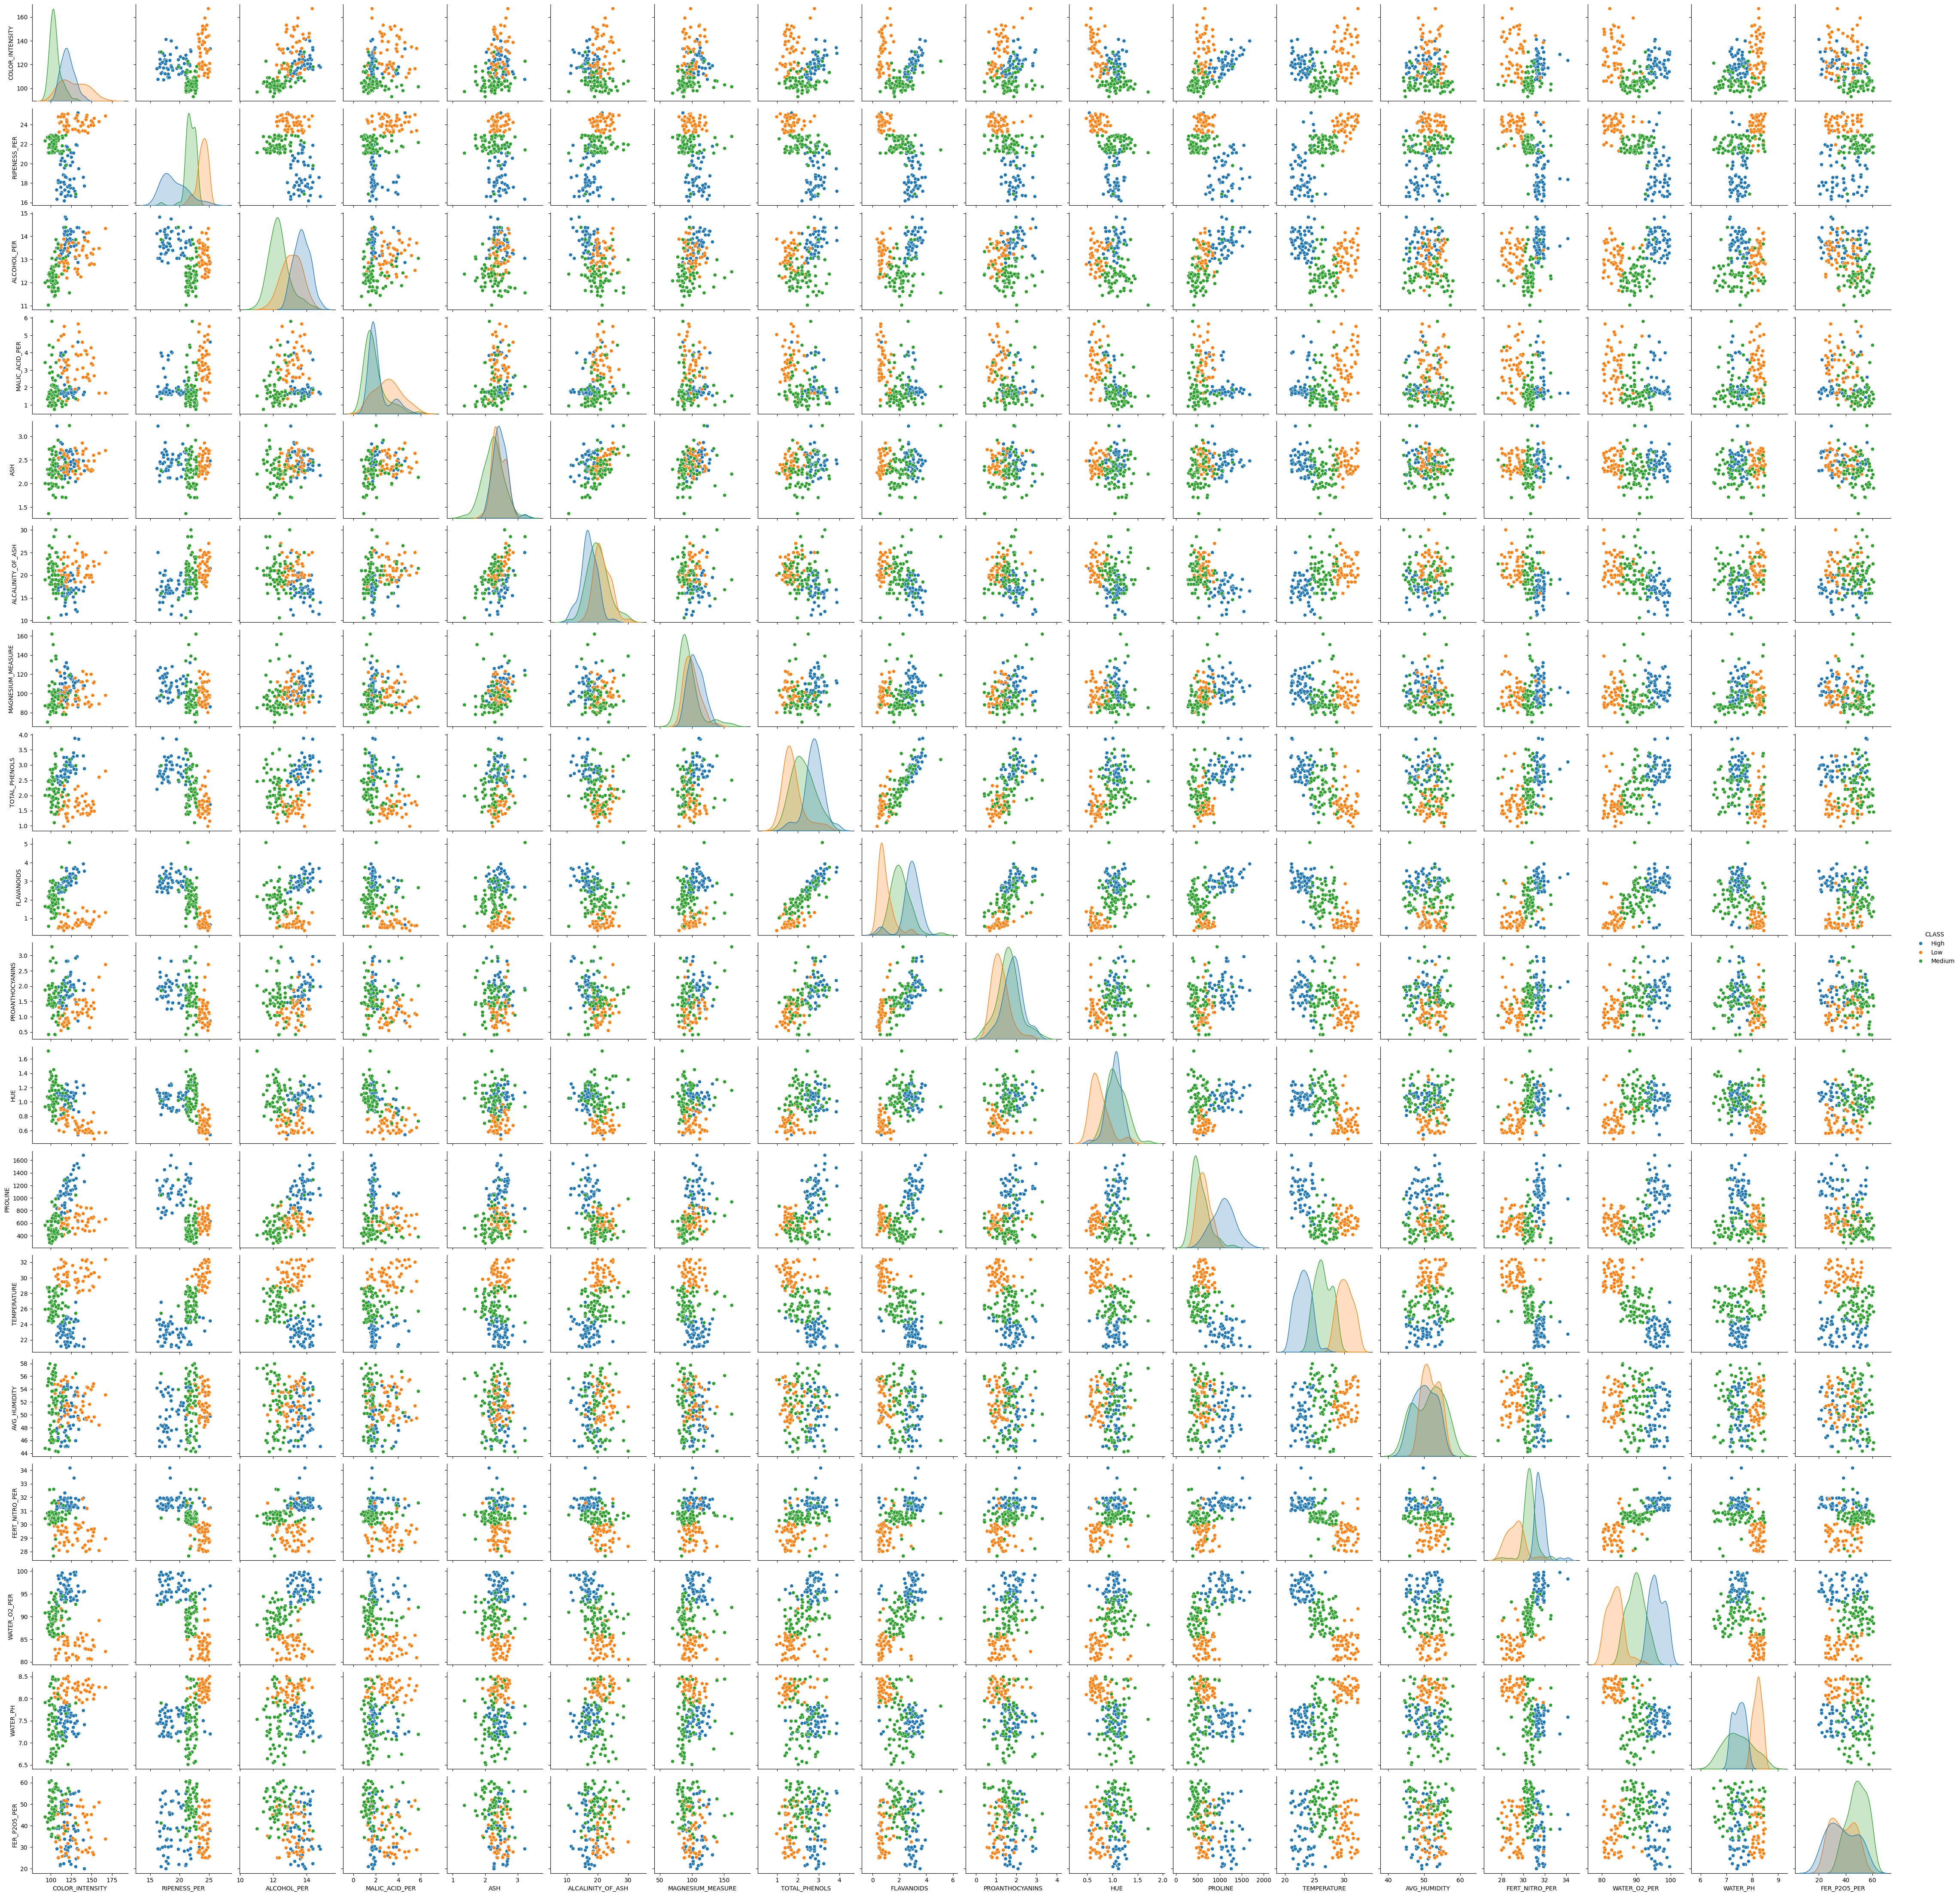

In [120]:
sns.pairplot(df, hue='CLASS')
plt.show()

# Experiment 5

In [121]:
import pandas as pd
from sklearn.datasets import load_iris

## Line plot

In [123]:
iris = load_iris()
pd.DataFrame(data=iris.data, columns=iris.feature_names)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [124]:
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})


In [125]:
avg_sepal_length = df.groupby('species')['sepal length (cm)'].mean()


In [126]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

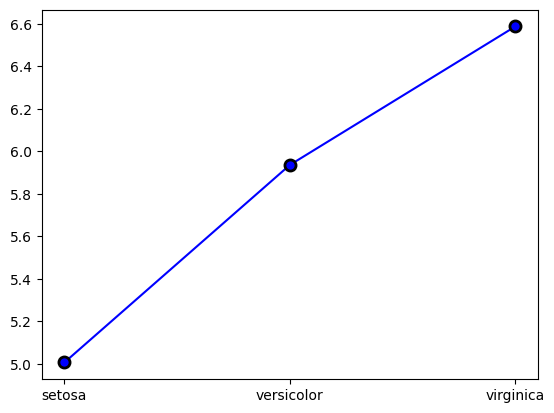

In [129]:
plt.plot(avg_sepal_length.index, avg_sepal_length.values, marker='o', linestyle='-', color='b', markersize=8, markeredgewidth=2, markeredgecolor='black')

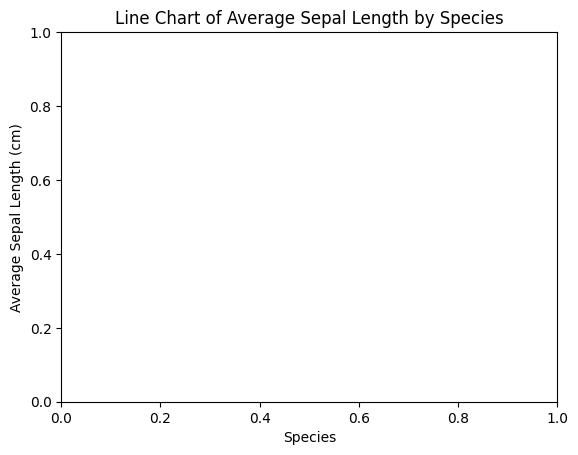

In [128]:
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.title('Line Chart of Average Sepal Length by Species')
plt.show()

## Count plot

<ipython-input-131-caa749b7a21a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species', palette='Set2')


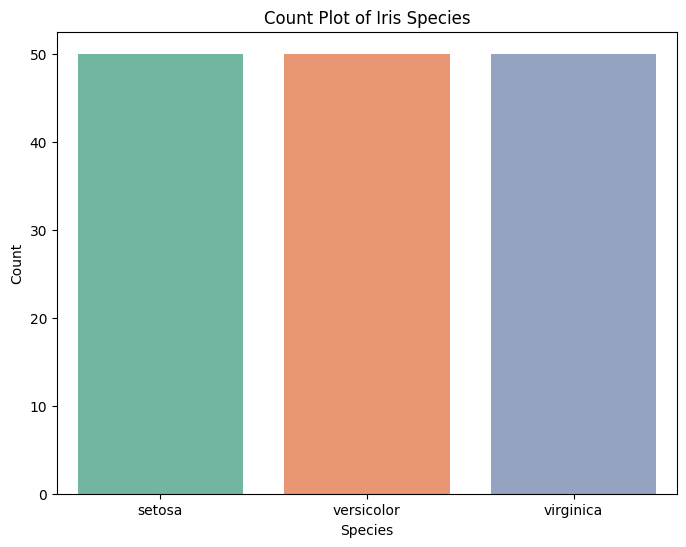

In [131]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='species', palette='Set2')

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count Plot of Iris Species')

plt.show()

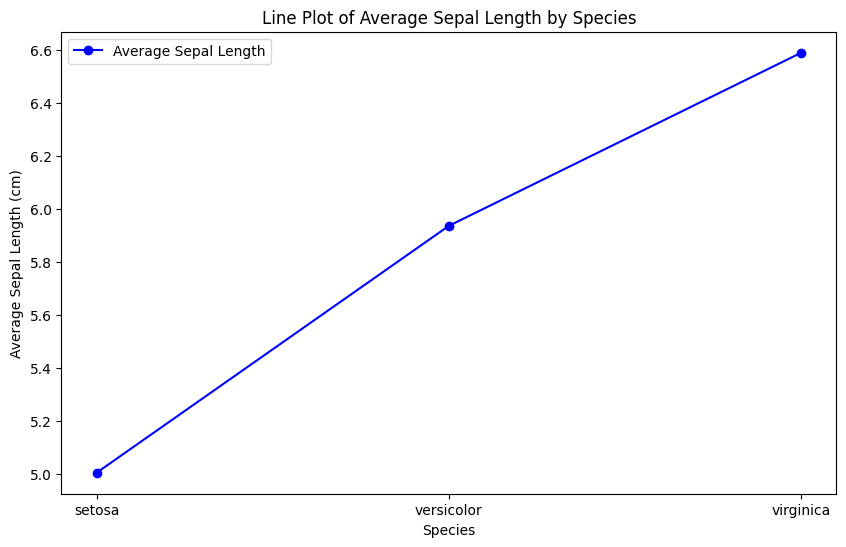

In [132]:
avg_sepal_length = df.groupby('species')['sepal length (cm)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_sepal_length.index, avg_sepal_length.values, marker='o', linestyle='-', color='b', label='Average Sepal Length')

plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.title('Line Plot of Average Sepal Length by Species')

plt.legend(loc='best')

plt.show()

# Experiment 6

In [135]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})


## Scatter plot

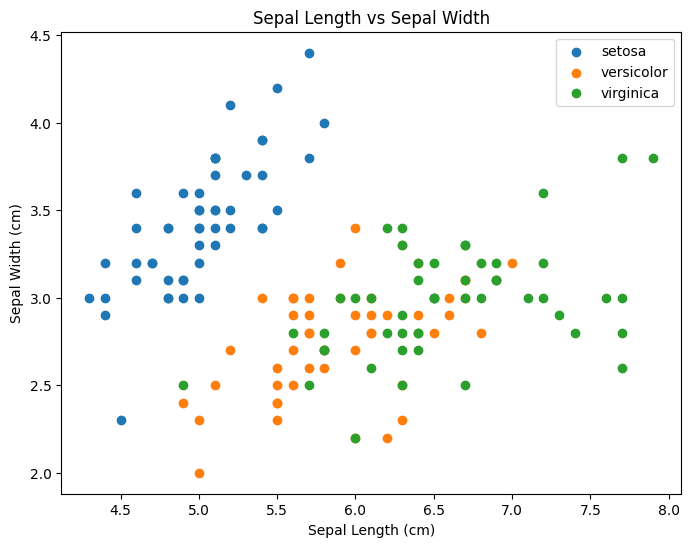

In [136]:
plt.figure(figsize=(8, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

## Histogram

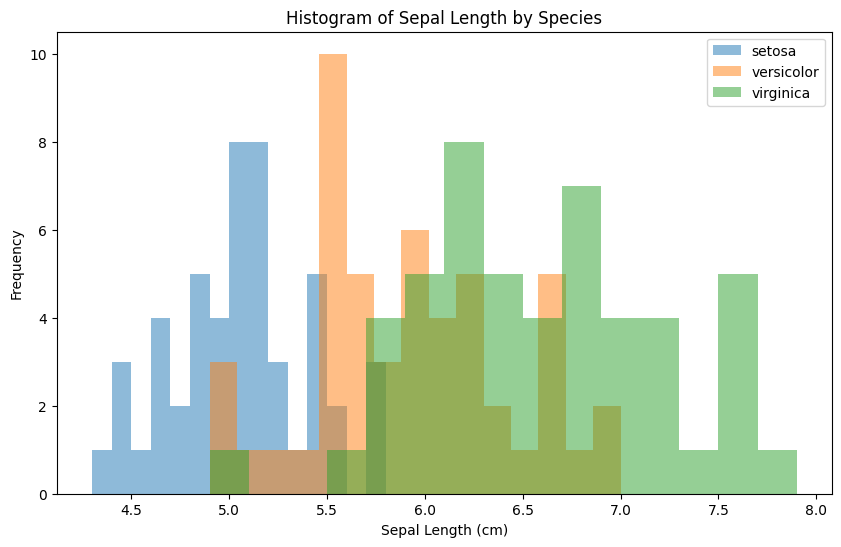

In [137]:
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['sepal length (cm)'], bins=15, alpha=0.5, label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length by Species')
plt.legend()
plt.show()

## Box plot

<Figure size 1000x600 with 0 Axes>

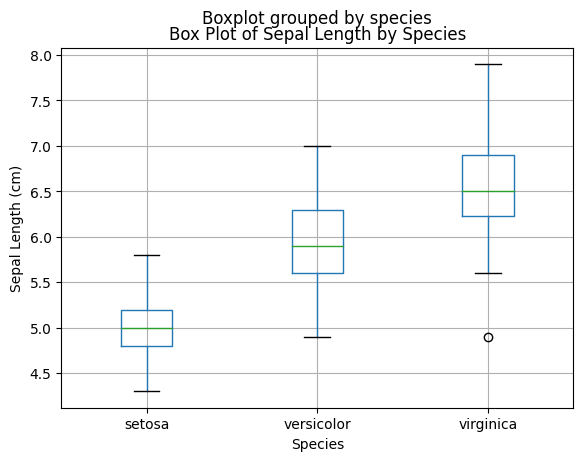

In [138]:
plt.figure(figsize=(10, 6))
df.boxplot(column='sepal length (cm)', by='species')

plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Box Plot of Sepal Length by Species')
plt.show()

## Bar plot

In [139]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})

avg_sepal_length = df.groupby('species')['sepal length (cm)'].mean()

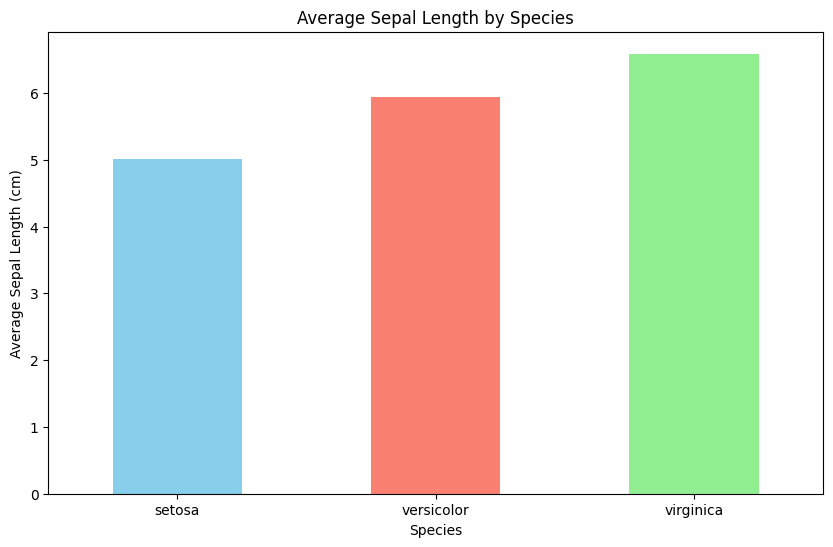

In [140]:
plt.figure(figsize=(10, 6))
avg_sepal_length.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])

plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.title('Average Sepal Length by Species')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal

plt.show()

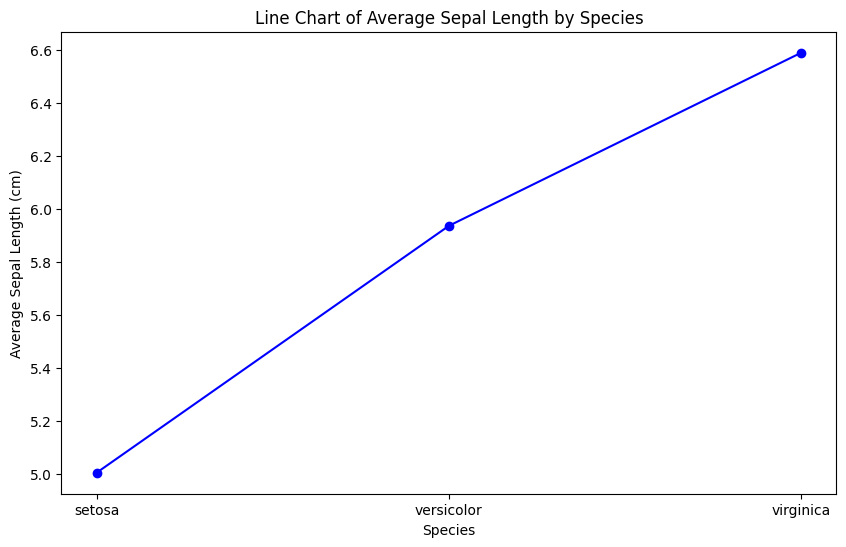

In [141]:
avg_sepal_length = df.groupby('species')['sepal length (cm)'].mean()
plt.figure(figsize=(10, 6))

plt.plot(avg_sepal_length.index, avg_sepal_length.values, marker='o', linestyle='-', color='b')

plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.title('Line Chart of Average Sepal Length by Species')

plt.show()